In [1]:
#pandas文档
#http://pandas.pydata.org/

In [2]:
#11.1日期和时间数据类型及工具
from datetime import datetime

In [3]:
now=datetime.now()

In [4]:
now

datetime.datetime(2019, 7, 18, 13, 49, 25, 209582)

In [5]:
now.year,now.month,now.day

(2019, 7, 18)

In [6]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)

In [7]:
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [11]:
start=datetime(2011,1,7)

In [12]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

# 字符串和datetime的相互转换

In [14]:
stamp=datetime(2011,1,3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [17]:
type(stamp)

datetime.datetime

In [18]:
value='2011-01-03'

In [19]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs=['7/6/2011','8/6/2011']

In [21]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [25]:
datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']

In [26]:
import pandas as pd
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [27]:
idx=pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

# 11.2 时间序列基础

In [30]:
from datetime import datetime

In [31]:
import numpy as np
def test():
    x=np.random.randint(0,10)
    y=np.random.randint(0,5)
    if x+2*y==10:
        return (x,y)
s=set() 
for i in range(1000000):
    s.add(test())
s

{(2, 4), (4, 3), (6, 2), (8, 1), None}

In [32]:
dates=[datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]

In [33]:
ts=pd.Series(np.random.randn(6),index=dates)

In [34]:
ts

2011-01-02    1.054914
2011-01-05   -1.165739
2011-01-07    0.689290
2011-01-08    1.506083
2011-01-10    1.826709
2011-01-12   -0.537131
dtype: float64

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [36]:
ts+ts[::2]

2011-01-02    2.109828
2011-01-05         NaN
2011-01-07    1.378579
2011-01-08         NaN
2011-01-10    3.653417
2011-01-12         NaN
dtype: float64

In [37]:
ts.index.dtype

dtype('<M8[ns]')

In [38]:
stamp=ts.index[0]

# 索引、选取、子集构造

In [39]:
stamp=ts.index[2]

In [40]:
ts[stamp]

0.6892895762140163

In [41]:
ts['1/10/2011']

1.8267087103885058

In [42]:
ts['20110110']

1.8267087103885058

In [43]:
longer_ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))

In [44]:
longer_ts

2000-01-01   -0.016705
2000-01-02   -0.082935
2000-01-03   -0.644043
2000-01-04    0.452686
2000-01-05   -1.186694
2000-01-06    0.115913
2000-01-07   -0.177399
2000-01-08    1.043653
2000-01-09   -0.345380
2000-01-10    0.539395
2000-01-11    1.099386
2000-01-12    1.046242
2000-01-13   -0.255232
2000-01-14    0.000668
2000-01-15    0.727724
2000-01-16    0.364473
2000-01-17    0.898431
2000-01-18   -0.373042
2000-01-19    0.553688
2000-01-20    0.520891
2000-01-21   -0.061819
2000-01-22   -0.789169
2000-01-23    0.597104
2000-01-24   -0.240595
2000-01-25   -0.815590
2000-01-26   -0.777674
2000-01-27   -0.247085
2000-01-28   -0.696849
2000-01-29    1.620972
2000-01-30    1.387412
                ...   
2002-08-28   -0.058368
2002-08-29   -1.170642
2002-08-30    0.893213
2002-08-31   -1.129500
2002-09-01   -0.717632
2002-09-02   -0.269642
2002-09-03    0.254087
2002-09-04    0.875781
2002-09-05    2.181142
2002-09-06    1.194617
2002-09-07    0.016191
2002-09-08   -0.131717
2002-09-09 

In [45]:
longer_ts['2001']

2001-01-01   -0.677468
2001-01-02    1.353425
2001-01-03    0.179864
2001-01-04   -0.732774
2001-01-05    0.511380
2001-01-06   -0.076862
2001-01-07   -1.699077
2001-01-08    1.110006
2001-01-09    1.052974
2001-01-10   -0.462763
2001-01-11    1.523416
2001-01-12    0.346654
2001-01-13   -0.512543
2001-01-14    0.229645
2001-01-15   -1.043711
2001-01-16    0.581277
2001-01-17   -0.617375
2001-01-18   -1.004547
2001-01-19    0.982924
2001-01-20    1.352753
2001-01-21   -0.775399
2001-01-22    0.596107
2001-01-23    0.348141
2001-01-24   -1.055969
2001-01-25   -1.801179
2001-01-26   -0.503080
2001-01-27    0.582612
2001-01-28   -1.354782
2001-01-29   -0.148767
2001-01-30    0.592598
                ...   
2001-12-02    0.706450
2001-12-03   -0.333347
2001-12-04    0.535290
2001-12-05   -0.706666
2001-12-06    3.291189
2001-12-07   -0.529545
2001-12-08   -0.596550
2001-12-09   -0.379589
2001-12-10    0.595836
2001-12-11   -1.239674
2001-12-12   -0.298945
2001-12-13   -1.207078
2001-12-14 

In [46]:
longer_ts['2001-05']

2001-05-01   -1.083089
2001-05-02   -0.449389
2001-05-03    2.934974
2001-05-04    1.033730
2001-05-05    0.507569
2001-05-06    0.025171
2001-05-07    0.546872
2001-05-08   -0.659570
2001-05-09    1.454510
2001-05-10   -0.601555
2001-05-11   -1.364087
2001-05-12   -0.493524
2001-05-13    1.604871
2001-05-14   -1.929077
2001-05-15   -1.475361
2001-05-16    0.650464
2001-05-17   -0.755733
2001-05-18    1.759243
2001-05-19    1.883270
2001-05-20   -0.472214
2001-05-21    2.098475
2001-05-22    0.135504
2001-05-23   -0.192316
2001-05-24    1.332367
2001-05-25   -0.167668
2001-05-26    1.813538
2001-05-27   -1.099448
2001-05-28    0.025212
2001-05-29    0.276598
2001-05-30   -0.199591
2001-05-31   -0.222151
Freq: D, dtype: float64

In [47]:
ts[datetime(2010,1,13):]

2011-01-02    1.054914
2011-01-05   -1.165739
2011-01-07    0.689290
2011-01-08    1.506083
2011-01-10    1.826709
2011-01-12   -0.537131
dtype: float64

In [48]:
ts

2011-01-02    1.054914
2011-01-05   -1.165739
2011-01-07    0.689290
2011-01-08    1.506083
2011-01-10    1.826709
2011-01-12   -0.537131
dtype: float64

In [49]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.689290
2011-01-08    1.506083
2011-01-10    1.826709
dtype: float64

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02    1.054914
2011-01-05   -1.165739
2011-01-07    0.689290
2011-01-08    1.506083
dtype: float64

In [51]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')

In [52]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [53]:
long_df=pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado','Texas','New York','Ohio'])

In [54]:
long_df.loc['5-2001']

Colorado     Texas  New York      Ohio
2001-05-02  1.440621 -1.224271 -1.209754  0.895578
2001-05-09  0.637270 -3.063961  1.952422 -0.157809
2001-05-16  0.536525 -0.215939  0.462274 -1.270292
2001-05-23 -1.318959  0.100757  0.390184 -1.782584
2001-05-30  1.116724  1.432486  0.897252  0.095149

# 带有重复索引的时间序列

In [55]:
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts=pd.Series(np.arange(5),index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [57]:
dup_ts.index.is_unique

False

In [58]:
dup_ts['1/3/2000']

4

In [59]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [60]:
grouped=dup_ts.groupby(level=0)

In [61]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [62]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3日期的范围、频率以及移动

In [63]:
ts

2011-01-02    1.054914
2011-01-05   -1.165739
2011-01-07    0.689290
2011-01-08    1.506083
2011-01-10    1.826709
2011-01-12   -0.537131
dtype: float64

In [64]:
resamper=ts.resample('D')

In [65]:
resamper

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

# 生成日期范围

In [66]:
index=pd.date_range('2012-04-01','2012-06-01')

In [67]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [68]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [71]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# 频率和日期偏移量

In [73]:
from pandas.tseries.offsets import Hour,Minute

In [74]:
hour=Hour()

In [75]:
hour

<Hour>

In [76]:
four_hours=Hour(4)

In [77]:
four_hours

<4 * Hours>

In [78]:
#一般无需明确创建这样的对象，只需将诸如‘H’或‘4H’这样的字符串别名即可。在基础频率前面放上一个整数即可创建倍数

In [79]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [80]:
Hour(2)+Minute(30)

<150 * Minutes>

# WOM 日期 week of Month

In [81]:
rng=pd.date_range('2012-01-01','2012-09-01',freq='WOM-3fri')

In [82]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

# 移动（超前和滞后）数据

In [83]:
ts=pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))

In [84]:
ts

2000-01-31   -0.042017
2000-02-29   -0.747335
2000-03-31    0.359778
2000-04-30   -0.299515
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.042017
2000-04-30   -0.747335
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31    0.359778
2000-02-29   -0.299515
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [87]:
ts/ts.shift(1)-1

2000-01-31          NaN
2000-02-29    16.786515
2000-03-31    -1.481414
2000-04-30    -1.832499
Freq: M, dtype: float64

In [88]:
ts.shift(2,freq='M')

2000-03-31   -0.042017
2000-04-30   -0.747335
2000-05-31    0.359778
2000-06-30   -0.299515
Freq: M, dtype: float64

In [89]:
ts.shift(3,freq='D')

2000-02-03   -0.042017
2000-03-03   -0.747335
2000-04-03    0.359778
2000-05-03   -0.299515
dtype: float64

In [90]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00   -0.042017
2000-02-29 01:30:00   -0.747335
2000-03-31 01:30:00    0.359778
2000-04-30 01:30:00   -0.299515
Freq: M, dtype: float64

# 通过偏移量对日期进行位移

In [91]:
from pandas.tseries.offsets import Day,MonthEnd

In [92]:
now=datetime(2011,11,17)

In [93]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [94]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [95]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [96]:
offset=MonthEnd()

In [97]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [98]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [99]:
#日期偏移量还有一个巧妙地用法，即结合groupby使用这两个‘滚动’方法：
ts=pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [100]:
ts

2000-01-15   -0.651691
2000-01-19    1.684867
2000-01-23    0.061160
2000-01-27    0.543553
2000-01-31    2.019221
2000-02-04   -0.093090
2000-02-08   -0.308784
2000-02-12    1.900313
2000-02-16   -0.964114
2000-02-20   -0.124368
2000-02-24    0.053092
2000-02-28    0.477591
2000-03-03   -0.436711
2000-03-07    0.923573
2000-03-11    2.171113
2000-03-15    0.635370
2000-03-19    1.962972
2000-03-23    0.144257
2000-03-27    0.461286
2000-03-31    0.451030
Freq: 4D, dtype: float64

In [101]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.731422
2000-02-29    0.134377
2000-03-31    0.789111
dtype: float64

In [102]:
ts.resample('M').mean()

2000-01-31    0.731422
2000-02-29    0.134377
2000-03-31    0.789111
Freq: M, dtype: float64

# 11.4 时区处理

In [103]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [104]:
tz=pytz.timezone('America/New_York')

In [105]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

# 时区本地化和转换

In [106]:
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='D')

In [107]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [108]:
ts

2012-03-09 09:30:00   -1.018041
2012-03-10 09:30:00   -0.253026
2012-03-11 09:30:00   -0.614907
2012-03-12 09:30:00    0.100845
2012-03-13 09:30:00   -1.386726
2012-03-14 09:30:00   -1.242585
Freq: D, dtype: float64

In [109]:
print(ts.index.tz)

None


In [110]:
pd.date_range('3/9/2012 9:30',periods =10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [111]:
ts

2012-03-09 09:30:00   -1.018041
2012-03-10 09:30:00   -0.253026
2012-03-11 09:30:00   -0.614907
2012-03-12 09:30:00    0.100845
2012-03-13 09:30:00   -1.386726
2012-03-14 09:30:00   -1.242585
Freq: D, dtype: float64

In [112]:
ts_utc=ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-09 09:30:00+00:00   -1.018041
2012-03-10 09:30:00+00:00   -0.253026
2012-03-11 09:30:00+00:00   -0.614907
2012-03-12 09:30:00+00:00    0.100845
2012-03-13 09:30:00+00:00   -1.386726
2012-03-14 09:30:00+00:00   -1.242585
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [115]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.018041
2012-03-10 04:30:00-05:00   -0.253026
2012-03-11 05:30:00-04:00   -0.614907
2012-03-12 05:30:00-04:00    0.100845
2012-03-13 05:30:00-04:00   -1.386726
2012-03-14 05:30:00-04:00   -1.242585
Freq: D, dtype: float64

In [116]:
ts_eastern=ts.tz_localize('America/New_York')

In [117]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.018041
2012-03-10 14:30:00+00:00   -0.253026
2012-03-11 13:30:00+00:00   -0.614907
2012-03-12 13:30:00+00:00    0.100845
2012-03-13 13:30:00+00:00   -1.386726
2012-03-14 13:30:00+00:00   -1.242585
Freq: D, dtype: float64

In [118]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.018041
2012-03-10 15:30:00+01:00   -0.253026
2012-03-11 14:30:00+01:00   -0.614907
2012-03-12 14:30:00+01:00    0.100845
2012-03-13 14:30:00+01:00   -1.386726
2012-03-14 14:30:00+01:00   -1.242585
Freq: D, dtype: float64

In [119]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

# 操作时区意识型 Timestamp对象

In [120]:
stamp=pd.Timestamp('2011-03-12 04:00')

In [121]:
stamp_utc=stamp.tz_localize('utc')

In [122]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [123]:
stamp_moscow=pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')

In [124]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [125]:
stamp_utc.value

1299902400000000000

In [126]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [127]:
from pandas.tseries.offsets import Hour

In [128]:
stamp=pd.Timestamp('2012-03-12 01:30',tz='US/Eastern')

In [129]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [130]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [131]:
#夏令时转变前90分钟
stamp=pd.Timestamp('2012-11-04 00:30',tz='US/Eastern')

In [132]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [133]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

# 不同时区之间的运算

In [134]:
#如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC

In [135]:
rng=pd.date_range('3/7/2012 9:30',periods=10,freq='B')

In [136]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [137]:
ts

2012-03-07 09:30:00   -2.735612
2012-03-08 09:30:00    1.758855
2012-03-09 09:30:00    0.060762
2012-03-12 09:30:00    0.033651
2012-03-13 09:30:00   -1.286641
2012-03-14 09:30:00    2.481538
2012-03-15 09:30:00   -0.852364
2012-03-16 09:30:00   -0.065581
2012-03-19 09:30:00   -0.031103
2012-03-20 09:30:00   -0.611471
Freq: B, dtype: float64

In [138]:
ts1=ts[:7].tz_localize('Europe/London')

In [139]:
ts2=ts1[2:].tz_convert('Europe/Moscow')

In [140]:
result=ts1+ts2

In [141]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [142]:
p=pd.Period(2007,freq='A-DEC')

# 11.5 时期及其算术运算

In [143]:
p

Period('2007', 'A-DEC')

In [144]:
p+5

Period('2012', 'A-DEC')

In [145]:
p-2

Period('2005', 'A-DEC')

In [146]:
pd.Period('2014',freq='A-DEC')-p

<7 * YearEnds: month=12>

In [147]:
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')

In [148]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [149]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -1.119300
2000-02    3.201366
2000-03    0.506356
2000-04   -0.722467
2000-05   -0.159973
2000-06    0.766445
Freq: M, dtype: float64

In [150]:
values=['2001Q3','2002Q2','2003Q1']

In [151]:
index=pd.PeriodIndex(values,freq='Q-DEC')

In [152]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

# 时期的频率转换

In [153]:
p=pd.Period('2007',freq='A-DEC')

In [154]:
p

Period('2007', 'A-DEC')

In [155]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [156]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [157]:
p=pd.Period('2007',freq='A-JUN')

In [158]:
p

Period('2007', 'A-JUN')

In [159]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [160]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [161]:
p=pd.Period('Aug-2007','M')

In [162]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [163]:
rng=pd.period_range('2006','2009',freq='A-DEC')

In [164]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [165]:
ts

2006    0.554289
2007   -0.439587
2008   -0.512937
2009    0.182382
Freq: A-DEC, dtype: float64

In [166]:
ts.asfreq('M',how='start')

2006-01    0.554289
2007-01   -0.439587
2008-01   -0.512937
2009-01    0.182382
Freq: M, dtype: float64

In [167]:
ts.asfreq('B',how='end')

2006-12-29    0.554289
2007-12-31   -0.439587
2008-12-31   -0.512937
2009-12-31    0.182382
Freq: B, dtype: float64

# 按季度计算的时期频率

In [168]:
p=pd.Period('2012Q4',freq='Q-JAN')

In [169]:
p

Period('2012Q4', 'Q-JAN')

In [170]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [171]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [172]:
p4pm=(p.asfreq('B','e')-1).asfreq('T','s')+16*60

In [173]:
p4pm

Period('2012-01-30 16:00', 'T')

In [174]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [175]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')

In [176]:
ts=pd.Series(np.arange(len(rng)),index=rng)

In [177]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [178]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60

In [179]:
ts.index=new_rng.to_timestamp()

In [180]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

# 将Timestamp 转换为Period（及其反向过程）

In [181]:
rng=pd.date_range('2000-01-01',periods=3,freq='M')

In [182]:
ts=pd.Series(np.random.randn(3),index=rng)

In [183]:
ts

2000-01-31    0.972247
2000-02-29    0.573553
2000-03-31   -0.878544
Freq: M, dtype: float64

In [184]:
pts=ts.to_period()

In [185]:
pts

2000-01    0.972247
2000-02    0.573553
2000-03   -0.878544
Freq: M, dtype: float64

In [186]:
rng=pd.date_range('1/20/2000',periods=6,freq='D')

In [187]:
ts2=pd.Series(np.random.randn(6),index=rng)

In [188]:
ts2

2000-01-20    0.551961
2000-01-21    0.388353
2000-01-22   -1.156725
2000-01-23    0.478259
2000-01-24   -0.453564
2000-01-25   -0.746083
Freq: D, dtype: float64

In [189]:
ts2.to_period('M')

2000-01    0.551961
2000-01    0.388353
2000-01   -1.156725
2000-01    0.478259
2000-01   -0.453564
2000-01   -0.746083
Freq: M, dtype: float64

In [190]:
pts=ts2.to_period()

In [191]:
pts

2000-01-20    0.551961
2000-01-21    0.388353
2000-01-22   -1.156725
2000-01-23    0.478259
2000-01-24   -0.453564
2000-01-25   -0.746083
Freq: D, dtype: float64

In [192]:
pts.to_timestamp(how='end')

2000-01-20 23:59:59.999999999    0.551961
2000-01-21 23:59:59.999999999    0.388353
2000-01-22 23:59:59.999999999   -1.156725
2000-01-23 23:59:59.999999999    0.478259
2000-01-24 23:59:59.999999999   -0.453564
2000-01-25 23:59:59.999999999   -0.746083
Freq: D, dtype: float64

# 通过数组创建PeriodIndex

In [193]:
data=pd.read_csv(r'C:\Users\86139\Desktop\examples_data_for_data_analysis\macrodata.csv')

In [194]:
data.head(5)

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [195]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [196]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [197]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')

In [198]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [199]:
data.index=index

In [200]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 重采样及频率转换

In [202]:
#重采样
rng=pd.date_range('2000-01-01',periods=100,freq='D')

In [203]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [204]:
ts

2000-01-01    1.747765
2000-01-02   -0.269767
2000-01-03   -1.195686
2000-01-04   -1.456855
2000-01-05    0.532455
2000-01-06    1.111048
2000-01-07    0.461609
2000-01-08   -0.108064
2000-01-09   -1.036405
2000-01-10   -0.805144
2000-01-11    0.506607
2000-01-12    1.040500
2000-01-13   -1.422963
2000-01-14    0.329111
2000-01-15    0.670203
2000-01-16   -0.572595
2000-01-17   -0.031447
2000-01-18    0.692034
2000-01-19    0.388732
2000-01-20    0.107110
2000-01-21   -0.328101
2000-01-22    0.369785
2000-01-23    0.626224
2000-01-24    0.273300
2000-01-25   -0.667953
2000-01-26   -0.810373
2000-01-27   -0.125692
2000-01-28   -2.178388
2000-01-29   -0.847150
2000-01-30   -0.160375
                ...   
2000-03-11   -1.326203
2000-03-12    0.959022
2000-03-13    0.090748
2000-03-14   -0.747433
2000-03-15   -2.177564
2000-03-16    2.539921
2000-03-17    0.114844
2000-03-18    0.017679
2000-03-19    1.221814
2000-03-20   -1.020489
2000-03-21    0.031391
2000-03-22   -2.408012
2000-03-23 

In [205]:
ts.resample('M').mean()

2000-01-31   -0.149125
2000-02-29   -0.041245
2000-03-31    0.020409
2000-04-30   -0.331933
Freq: M, dtype: float64

In [206]:
ts.resample('M',kind='period').mean()

2000-01   -0.149125
2000-02   -0.041245
2000-03    0.020409
2000-04   -0.331933
Freq: M, dtype: float64

# 降采样

In [208]:
rng=pd.date_range('2000-01-01',periods=12,freq='T')

In [209]:
ts=pd.Series(np.arange(12),index=rng)

In [210]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [211]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [212]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [213]:
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [214]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [215]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [216]:
ts.resample('5min').ohlc()

open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     11

In [217]:
frame=pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),columns=['Colorado','Texas','New York','Ohio'])

In [218]:
frame

Colorado     Texas  New York      Ohio
2000-01-05  0.608032  1.294797  0.648911  0.672214
2000-01-12 -0.314564  0.193409 -0.789280 -1.245148

In [219]:
df_daily=frame.resample('D').asfreq()

In [220]:
df_daily

Colorado     Texas  New York      Ohio
2000-01-05  0.608032  1.294797  0.648911  0.672214
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.314564  0.193409 -0.789280 -1.245148

In [221]:
frame.resample('D').ffill()

Colorado     Texas  New York      Ohio
2000-01-05  0.608032  1.294797  0.648911  0.672214
2000-01-06  0.608032  1.294797  0.648911  0.672214
2000-01-07  0.608032  1.294797  0.648911  0.672214
2000-01-08  0.608032  1.294797  0.648911  0.672214
2000-01-09  0.608032  1.294797  0.648911  0.672214
2000-01-10  0.608032  1.294797  0.648911  0.672214
2000-01-11  0.608032  1.294797  0.648911  0.672214
2000-01-12 -0.314564  0.193409 -0.789280 -1.245148

In [222]:
frame.resample('D').ffill(limit=2)

Colorado     Texas  New York      Ohio
2000-01-05  0.608032  1.294797  0.648911  0.672214
2000-01-06  0.608032  1.294797  0.648911  0.672214
2000-01-07  0.608032  1.294797  0.648911  0.672214
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.314564  0.193409 -0.789280 -1.245148

In [223]:
frame.resample('W-THU').ffill()

Colorado     Texas  New York      Ohio
2000-01-06  0.608032  1.294797  0.648911  0.672214
2000-01-13 -0.314564  0.193409 -0.789280 -1.245148

# 通过时期进行重采样

In [224]:
frame=pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'),columns=['Colorado','Texas','New York','Ohio'])

In [225]:
frame[:5]

Colorado     Texas  New York      Ohio
2000-01  0.234277 -0.672430 -1.798646 -0.197279
2000-02  1.242280 -1.619686 -0.292369  0.673549
2000-03 -0.179430 -0.592748 -1.123225  1.316475
2000-04  0.065117  0.083797 -2.088086 -0.396154
2000-05 -0.025457  0.837962  0.496166  1.841896

In [226]:
annual_frame=frame.resample('A-DEC').mean()

In [227]:
annual_frame

Colorado     Texas  New York      Ohio
2000 -0.020300 -0.332868 -0.991838  0.297806
2001  0.272897 -0.417604  0.215805  0.001095

In [229]:
annual_frame.resample('Q-DEC').ffill()

Colorado     Texas  New York      Ohio
2000Q1 -0.020300 -0.332868 -0.991838  0.297806
2000Q2 -0.020300 -0.332868 -0.991838  0.297806
2000Q3 -0.020300 -0.332868 -0.991838  0.297806
2000Q4 -0.020300 -0.332868 -0.991838  0.297806
2001Q1  0.272897 -0.417604  0.215805  0.001095
2001Q2  0.272897 -0.417604  0.215805  0.001095
2001Q3  0.272897 -0.417604  0.215805  0.001095
2001Q4  0.272897 -0.417604  0.215805  0.001095

In [230]:
annual_frame.resample('Q-DEC',convention='end').ffill()

Colorado     Texas  New York      Ohio
2000Q4 -0.020300 -0.332868 -0.991838  0.297806
2001Q1 -0.020300 -0.332868 -0.991838  0.297806
2001Q2 -0.020300 -0.332868 -0.991838  0.297806
2001Q3 -0.020300 -0.332868 -0.991838  0.297806
2001Q4  0.272897 -0.417604  0.215805  0.001095

In [231]:
annual_frame.resample('Q-MAR').ffill()

Colorado     Texas  New York      Ohio
2000Q4 -0.020300 -0.332868 -0.991838  0.297806
2001Q1 -0.020300 -0.332868 -0.991838  0.297806
2001Q2 -0.020300 -0.332868 -0.991838  0.297806
2001Q3 -0.020300 -0.332868 -0.991838  0.297806
2001Q4  0.272897 -0.417604  0.215805  0.001095
2002Q1  0.272897 -0.417604  0.215805  0.001095
2002Q2  0.272897 -0.417604  0.215805  0.001095
2002Q3  0.272897 -0.417604  0.215805  0.001095

# 11.7 移动窗口函数

In [233]:
close_px_all=pd.read_csv(r'C:\Users\86139\Desktop\examples_data_for_data_analysis\stock_px_2.csv',parse_dates=True,index_col=0)

In [234]:
close_px=close_px_all[['AAPL','MSFT','XOM']]

In [236]:
close_px=close_px.resample('B').ffill()

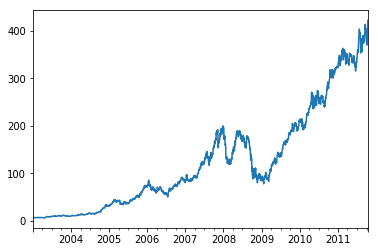

In [238]:
close_px.AAPL.plot()

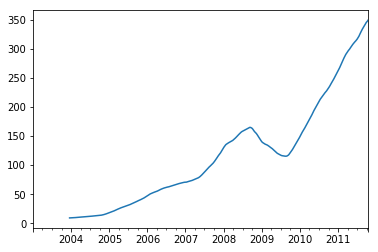

In [240]:
close_px.AAPL.rolling(250).mean().plot()

In [241]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()

In [242]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

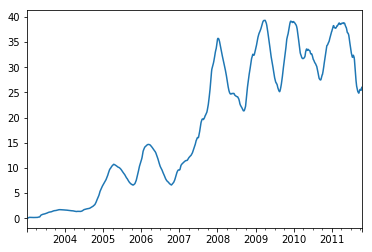

In [243]:
appl_std250.plot()

In [244]:
expanding_mean=appl_std250.expanding().mean()

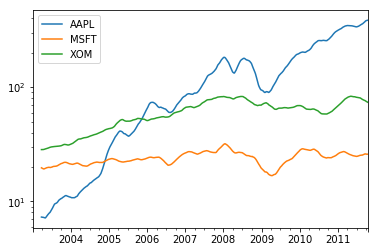

In [245]:
close_px.rolling(60).mean().plot(logy=True)

In [246]:
close_px.rolling('20D').mean()

AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
2003-01-09    7.391667  21.490000  29.273333
2003-01-10    7.387143  21.558571  29.238571
2003-01-13    7.378750  21.633750  29.197500
2003-01-14    7.370000  21.717778  29.194444
2003-01-15    7.355000  21.757000  29.152000
2003-01-16    7.350909  21.756364  29.129091
2003-01-17    7.325833  21.628333  29.085000
2003-01-20    7.304615  21.520000  29.047692
2003-01-21    7.283571  21.423571  28.968571
2003-01-22    7.250714  21.347143  28.851429
2003-01-23    7.225000  21.304286  28.728571
2003-01-24    7.203333  21.190000  28.608667
2003-01-27    7.160000  20.980000  28.316429
2003-01-28    7.160714  20.827857  28.178571
2003-01-29    7.170000  20.662143  28.067143
2003-01-30    7.155714  20.446429  27.948571
2003-01-31    7.157333  20.326667  27.960667
2003-02-03    7.147857  19.959286  27.846429
2003-02-04    7.153571  19.707857  27.828571
2003-02-05    7.147143  19.472143  27.772143
2003-02-06    7.159286  19.358571  27.720000
2003-02-07    7.153333  19.288000  27.716000
2003-02-10    7.172857  19.110714  27.647857
2003-02-11    7.190000  18.982857  27.654286
2003-02-12    7.197857  18.819286  27.625714
...                ...        ...        ...
2011-09-05  375.711429  25.276429  72.607857
2011-09-06  375.661429  25.295000  72.392857
2011-09-07  376.938571  25.390000  72.586429
2011-09-08  378.946429  25.545000  72.802143
2011-09-09  378.848667  25.558000  72.682667
2011-09-12  380.902143  25.754286  72.731429
2011-09-13  381.505000  25.835714  72.596429
2011-09-14  382.617857  25.973571  72.658571
2011-09-15  383.287857  26.097857  72.756429
2011-09-16  384.435333  26.166000  72.876000
2011-09-19  385.585714  26.259286  72.772143
2011-09-20  387.630000  26.286429  72.771429
2011-09-21  389.852143  26.270714  72.662857
2011-09-22  391.835714  26.217857  72.455714
2011-09-23  392.666667  26.140667  72.246000
2011-09-26  395.670000  26.160000  72.294286
2011-09-27  396.765000  26.136429  72.241429
2011-09-28  397.684286  26.090714  72.187857
2011-09-29  398.619286  26.070000  72.392857
2011-09-30  397.466000  25.991333  72.408667
2011-10-03  398.002143  25.890714  72.413571
2011-10-04  396.802143  25.807857  72.427143
2011-10-05  395.751429  25.729286  72.422857
2011-10-06  394.099286  25.673571  72.375714
2011-10-07  392.479333  25.712000  72.454667
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333

[2292 rows x 3 columns]

# 指数加权函数

In [247]:
aapl_px=close_px.AAPL['2006':'2007']

In [248]:
ma60=aapl_px.rolling(30,min_periods=20).mean()

In [249]:
ewma60=aapl_px.ewm(span=30).mean()

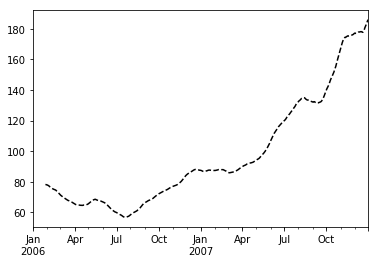

In [250]:
ma60.plot(style='k--',label='Simple MA')

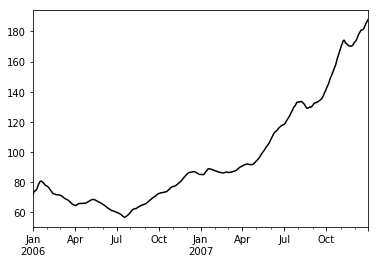

In [251]:
ewma60.plot(style='k-',label='EW MA')

# 二元移动窗口函数

In [253]:
spx_px=close_px_all['SPX']

In [254]:
spx_rets=spx_px.pct_change()

In [255]:
returns=close_px.pct_change()

In [256]:
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

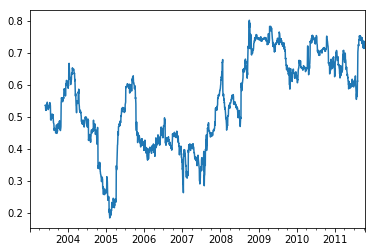

In [257]:
corr.plot()

In [258]:
corr=returns.rolling(125,min_periods=100).corr(spx_rets)

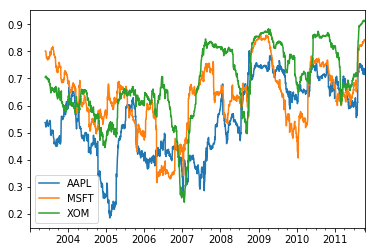

In [259]:
corr.plot()

# 用户定义的移动窗口函数

In [261]:
from scipy.stats import percentileofscore

In [262]:
score_at_2percent=lambda x:percentileofscore(x,0.02)

In [263]:
result=returns.AAPL.rolling(250).apply(score_at_2percent)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


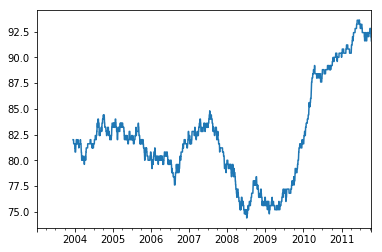

In [264]:
result.plot()